In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

# import sklearn.preprocessing
# help(sklearn.preprocessing)

%matplotlib inline

In [6]:
pd.read_csv('kc_house_data.csv')

x_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/kingcountyprice/x_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/kingcountyprice/y_train.csv")
x_test= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/kingcountyprice/x_test.csv")


display(x_train.head())
display(y_train.head())

,ID,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2,8651400730,20150428T000000,3,1.00,840,5525,1.0,0,0,...,6,840,0,1969,0,98042,47.3607,-122.085,920,5330
1,3,3163600130,20150317T000000,3,1.00,1250,8000,1.0,0,0,...,7,1250,0,1956,0,98146,47.5065,-122.337,1040,6973
2,4,5045700330,20140725T000000,4,2.50,2200,6400,2.0,0,0,...,8,2200,0,2010,0,98059,47.4856,-122.156,2600,5870
3,5,1036100130,20140808T000000,3,2.50,1980,39932,2.0,0,0,...,8,1980,0,1994,0,98011,47.7433,-122.196,2610,12769
4,6,7696630080,20140506T000000,3,1.75,1690,7735,1.0,0,0,...,7,1060,630,1976,0,98001,47.3324,-122.280,1580,7503


,ID,price
0,2,191000.0
1,3,234900.0
2,4,460000.0
3,5,442000.0
4,6,197000.0


In [7]:
x_train.info()
print(x_train.describe())

x_train[x_train.isna().any(axis=1)]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             17290 non-null  int64  
 1   id             17290 non-null  int64  
 2   date           17290 non-null  object 
 3   bedrooms       17290 non-null  int64  
 4   bathrooms      17290 non-null  float64
 5   sqft_living    17290 non-null  int64  
 6   sqft_lot       17290 non-null  int64  
 7   floors         17290 non-null  float64
 8   waterfront     17290 non-null  int64  
 9   view           17290 non-null  int64  
 10  condition      17290 non-null  int64  
 11  grade          17290 non-null  int64  
 12  sqft_above     17290 non-null  int64  
 13  sqft_basement  17290 non-null  int64  
 14  yr_built       17290 non-null  int64  
 15  yr_renovated   17290 non-null  int64  
 16  zipcode        17290 non-null  int64  
 17  lat            17290 non-null  float64
 18  long  

,ID,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [8]:

cols = x_train.columns
for col in cols:
    print(f'{col} : {len(x_train[col].unique())} || {len(x_test[col].unique())}')
    

ID : 17290 || 4323
id : 17175 || 4300
date : 369 || 327
bedrooms : 13 || 11
bathrooms : 30 || 24
sqft_living : 933 || 695
sqft_lot : 8443 || 2998
floors : 6 || 6
waterfront : 2 || 2
view : 5 || 5
condition : 5 || 5
grade : 12 || 11
sqft_above : 852 || 643
sqft_basement : 284 || 213
yr_built : 116 || 116
yr_renovated : 68 || 46
zipcode : 70 || 70
lat : 4827 || 2605
long : 727 || 567
sqft_living15 : 715 || 518
sqft_lot15 : 7492 || 2717


In [9]:
corr = x_train.iloc[:,3:].corr(method='pearson', min_periods=1)
corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.519043,0.572590,0.031835,0.182103,-0.010473,0.079761,0.024047,0.354978,0.476240,0.300155,0.155058,0.015929,-0.145540,-0.010507,0.123536,0.385064,0.027476
bathrooms,0.519043,1.000000,0.756608,0.084014,0.499213,0.057418,0.189596,-0.123366,0.664255,0.687326,0.287523,0.503265,0.052379,-0.204617,0.025455,0.223369,0.565517,0.086573
sqft_living,0.572590,0.756608,1.000000,0.167361,0.357815,0.102199,0.288236,-0.061587,0.761755,0.878108,0.437020,0.316533,0.056370,-0.199074,0.053682,0.237002,0.752627,0.179536
sqft_lot,0.031835,0.084014,0.167361,1.000000,-0.006630,0.024568,0.080744,-0.008710,0.104864,0.178958,0.012988,0.048652,0.008269,-0.127641,-0.090765,0.220163,0.142885,0.723477
floors,0.182103,0.499213,0.357815,-0.006630,1.000000,0.023574,0.035181,-0.259076,0.458337,0.526265,-0.242284,0.482094,0.008850,-0.062997,0.049998,0.124553,0.281275,-0.012170
waterfront,-0.010473,0.057418,0.102199,0.024568,0.023574,1.000000,0.386403,0.010343,0.081303,0.072670,0.076756,-0.024235,0.095303,0.027030,-0.013865,-0.042733,0.087688,0.036632
view,0.079761,0.189596,0.288236,0.080744,0.035181,0.386403,1.000000,0.042490,0.257714,0.172210,0.278032,-0.051200,0.105535,0.081620,0.007924,-0.079918,0.285454,0.079158
condition,0.024047,-0.123366,-0.061587,-0.008710,-0.259076,0.010343,0.042490,1.000000,-0.144605,-0.158554,0.169482,-0.358627,-0.060897,0.006291,-0.010036,-0.106730,-0.092985,-0.005103
grade,0.354978,0.664255,0.761755,0.104864,0.458337,0.081303,0.257714,-0.144605,1.000000,0.754392,0.172194,0.444161,0.016086,-0.184776,0.118784,0.197825,0.712294,0.113623
sqft_above,0.476240,0.687326,0.878108,0.178958,0.526265,0.072670,0.172210,-0.158554,0.754392,1.000000,-0.046604,0.420766,0.025210,-0.259459,0.000809,0.339301,0.730620,0.192651


<Axes: >

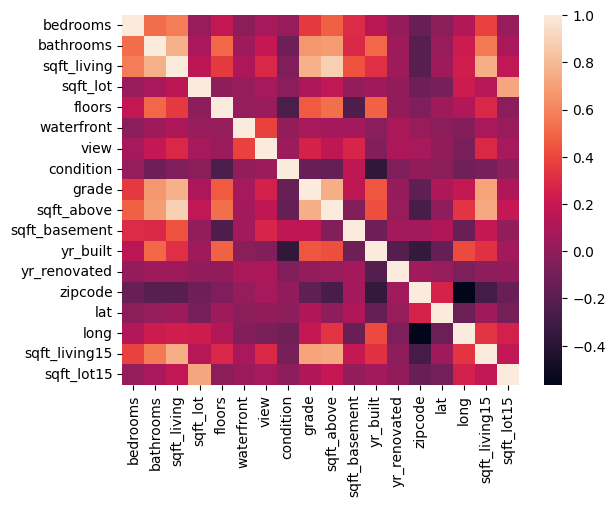

In [10]:
sns.heatmap(corr)

[   0 1986 2009 2003 2005 1996 1994 1963 2014 2000 1985 2004 2015 1987
 1934 2011 1946 1980 2013 1995 1950 1956 2010 1981 1983 1978 2008 1958
 1993 1977 1975 1992 1989 1964 1991 2001 1982 1998 1973 1990 1976 1955
 2002 2007 1984 1999 1969 1960 1945 1968 1951 1988 2012 1965 1979 1972
 1974 1940 1970 1962 2006 1997 1959 1953 1957 1944 1967 1948]


C:\Users\tale0\AppData\Local\Temp\ipykernel_28756\1452520296.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=train_num['yr_renovated'])


<Axes: ylabel='Density'>

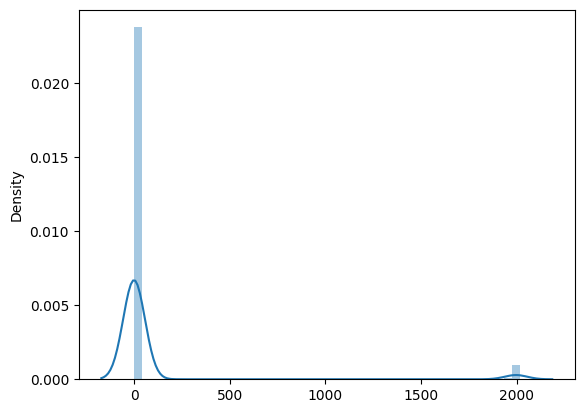

In [20]:
cols_num=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15','zipcode'] # ,'zipcode'
cols_cg = ['waterfront','view'] # ID, id, date

train_num = x_train[cols_num]
test_num = x_test[cols_num]
train_cg = x_train[cols_cg]
test_cg = x_test[cols_cg]

# 로그변환
cols_log = ['sqft_lot','sqft_lot15','sqft_living','sqft_living15','sqft_above','sqft_basement']
# for col_log in cols_log:
#     tmp_num[col_log] = np.log1p(tmp_num[col_log])
#     # tmp_num[col_log] = np.sqrt(tmp_num[col_log])

# tmp_num.boxplot(figsize=(20,10))
print(train_num['yr_renovated'].unique())
sns.distplot(x=train_num['yr_renovated'])
# sns.histplot(tmp_num['yr_renovated'],bins=6) # 
# sns.countplot(tmp_num['yr_renovated']) # 컬럼 내 값별 빈도 수

In [23]:
print('train null : \n',x_train.isnull().sum())
print('test null : \n',x_test.isnull().sum())

# train 셋의 중복값 확인
x_train.duplicated().sum()
#중복값의 존재가 확인되었으므로 삭제해줌
x_train.drop_duplicates(keep='first', inplace=True)

train null : 
 ID               0
id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
test null : 
 ID               0
id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [24]:
print(len(train_num[train_num['yr_renovated']==0]))
train_num[train_num['yr_renovated']==0]


16560


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,zipcode
0,3,1.00,840,5525,1.0,5,6,840,0,1969,0,47.3607,-122.085,920,5330,98042
1,3,1.00,1250,8000,1.0,3,7,1250,0,1956,0,47.5065,-122.337,1040,6973,98146
2,4,2.50,2200,6400,2.0,3,8,2200,0,2010,0,47.4856,-122.156,2600,5870,98059
3,3,2.50,1980,39932,2.0,3,8,1980,0,1994,0,47.7433,-122.196,2610,12769,98011
4,3,1.75,1690,7735,1.0,4,7,1060,630,1976,0,47.3324,-122.280,1580,7503,98001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,3,1.50,1840,10956,1.0,4,8,1840,0,1970,0,47.6746,-122.164,1680,10950,98033
17286,3,2.00,1200,2016,1.0,4,7,600,600,1931,0,47.5811,-122.404,1730,4520,98116
17287,3,2.50,2180,15484,1.0,3,8,2180,0,1992,0,47.2688,-122.309,2090,10775,98003
17288,5,2.75,3030,7000,1.0,4,7,1540,1490,1978,0,47.3661,-122.280,1790,7330,98032


<Axes: >

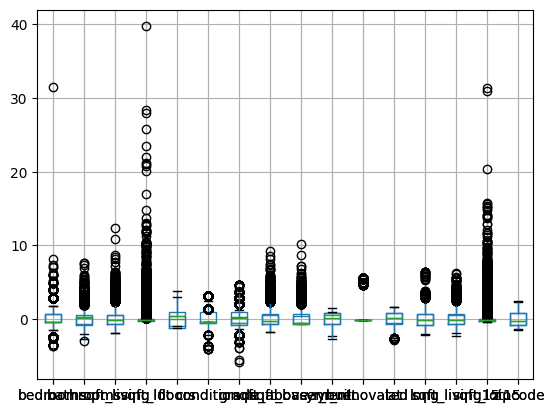

In [25]:

# 수치 정규화
scaler = StandardScaler()
# scaler = MinMaxScaler()
train_num_scaled = scaler.fit_transform(train_num)
train_num_scaled = pd.DataFrame(train_num_scaled,columns=cols_num)
train_num_scaled.boxplot()

test_num_scaled = scaler.fit_transform(test_num)
test_num_scaled = pd.DataFrame(test_num_scaled,columns=cols_num)
test_num_scaled.boxplot()

In [26]:
# 범주형 one-hot encoding

train_cg_oh = pd.get_dummies(train_cg,columns=cols_cg)
test_cg_oh = pd.get_dummies(test_cg,columns=cols_cg)
test_cg_oh

,waterfront_0,waterfront_1,view_0,view_1,view_2,view_3,view_4
0,True,False,True,False,False,False,False
1,True,False,True,False,False,False,False
2,True,False,True,False,False,False,False
3,True,False,True,False,False,False,False
4,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...
4318,True,False,False,False,True,False,False
4319,True,False,True,False,False,False,False
4320,True,False,True,False,False,False,False
4321,True,False,True,False,False,False,False


In [27]:
# X 병합

X = pd.concat([train_num_scaled,train_cg_oh],axis=1)
x_test_set = pd.concat([test_num_scaled,test_cg_oh],axis=1)
y = y_train['price']

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.1)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import GridSearchCV

def rmsle(log1p_actual, log1p_pred):
    squared_error = (log1p_actual-log1p_pred)**2   
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle


In [30]:

lr_reg = LinearRegression()
lr_reg.fit(X_train,Y_train)

lr_pred= lr_reg.predict(X_test)
#평가 - 실제값(y_val)과 예측값(lr_pred)이 모두 log1p처리된 상태임
# print('Linear Regression 모델의 RMSLE: ', round(rmsle(Y_test, lr_pred),3))

# lr_reg.score()
lr_reg.score(X_test,Y_test)

0.7103517225083933

In [29]:
rf = RandomForestRegressor(random_state=0, max_depth=5, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf.fit(X_train, Y_train)
rf.score(X_test,Y_test)

0.7448981266785811

In [31]:
et =  ExtraTreesRegressor()
et.fit(X_train,Y_train)
et.score(X_test,Y_test)


0.8566789559082922

In [36]:
param_et = {
    "n_estimators" : [50,100,150],
    "max_depth": [5,10,15]
}
param_rf = {
    "n_estimators" : [50,100,150],
    "max_depth": [5,10,15],
    "max_features":[6,12,16],
    "min_samples_leaf":[8,12],
    "min_samples_split":[8,16]
}
# gs_et = GridSearchCV(estimator=et,param_grid=param_et,scoring="accuracy")
# gs_et.fit(X_train,Y_train)
gs_rf = GridSearchCV(estimator=rf,param_grid=param_rf,cv=3,n_jobs=-1)
gs_rf.fit(X_train,Y_train)